# Diabetes-EDA and Prediction

# load libraries and read data

import relevant library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()
import warnings
warnings.filterwarnings('ignore') 

load the diabetes dataset

In [2]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


This dataset consist of independent variables such as pregnancies patient had,Glucose level, BloodPressure, SkinThickness, BMI, Insulin and so on and dependent variable outcome which we have to predict. 

# Exploratory Data Analysis 

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There is no null values in dataset and all independent variables are of int and float type. Further we will check for missing values and outliers.

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

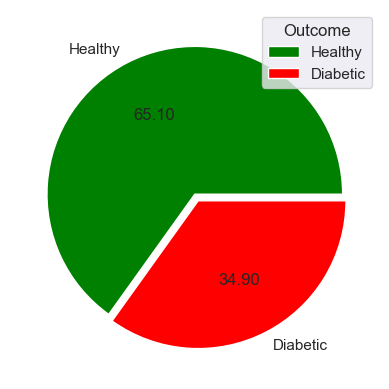

In [8]:
#plot a pie chart for outcome variable.
y=np.array([500,268])
label=['Healthy','Diabetic']
plt.pie(y,labels=label,explode=[0,0.05],colors=['green','red'],autopct='%.2f')
plt.legend(title='Outcome')
plt.show()

This show that dataset is not balanced. we have more data of non-diabetic patient than diabetic patient.

check for missing values because insulin, blood pressure, glucose, bmi, age,skin thickness can't be 0. so they must be replaced with null values.

In [9]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,np.NaN)

In [10]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [11]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

plot heatmap to find relation among all variables.

<Axes: >

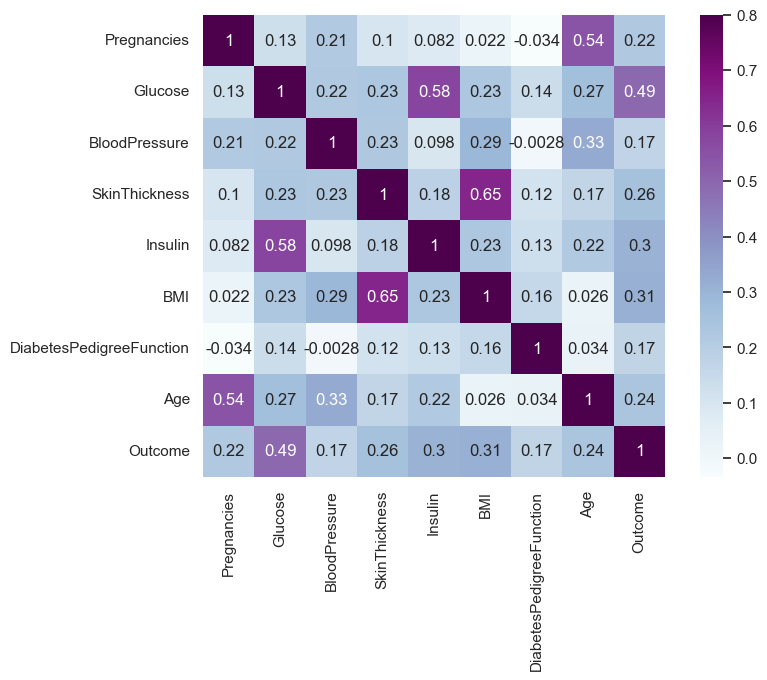

In [12]:
corr_matrix=data.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix,vmax=.8,square=True,cmap='BuPu',annot=True)

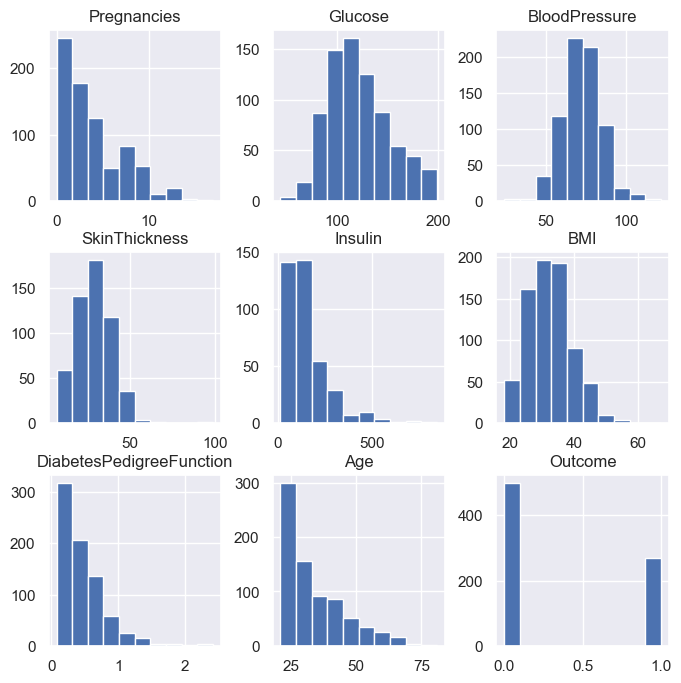

In [13]:
his=data.hist(figsize=(8,8))

check for outliers

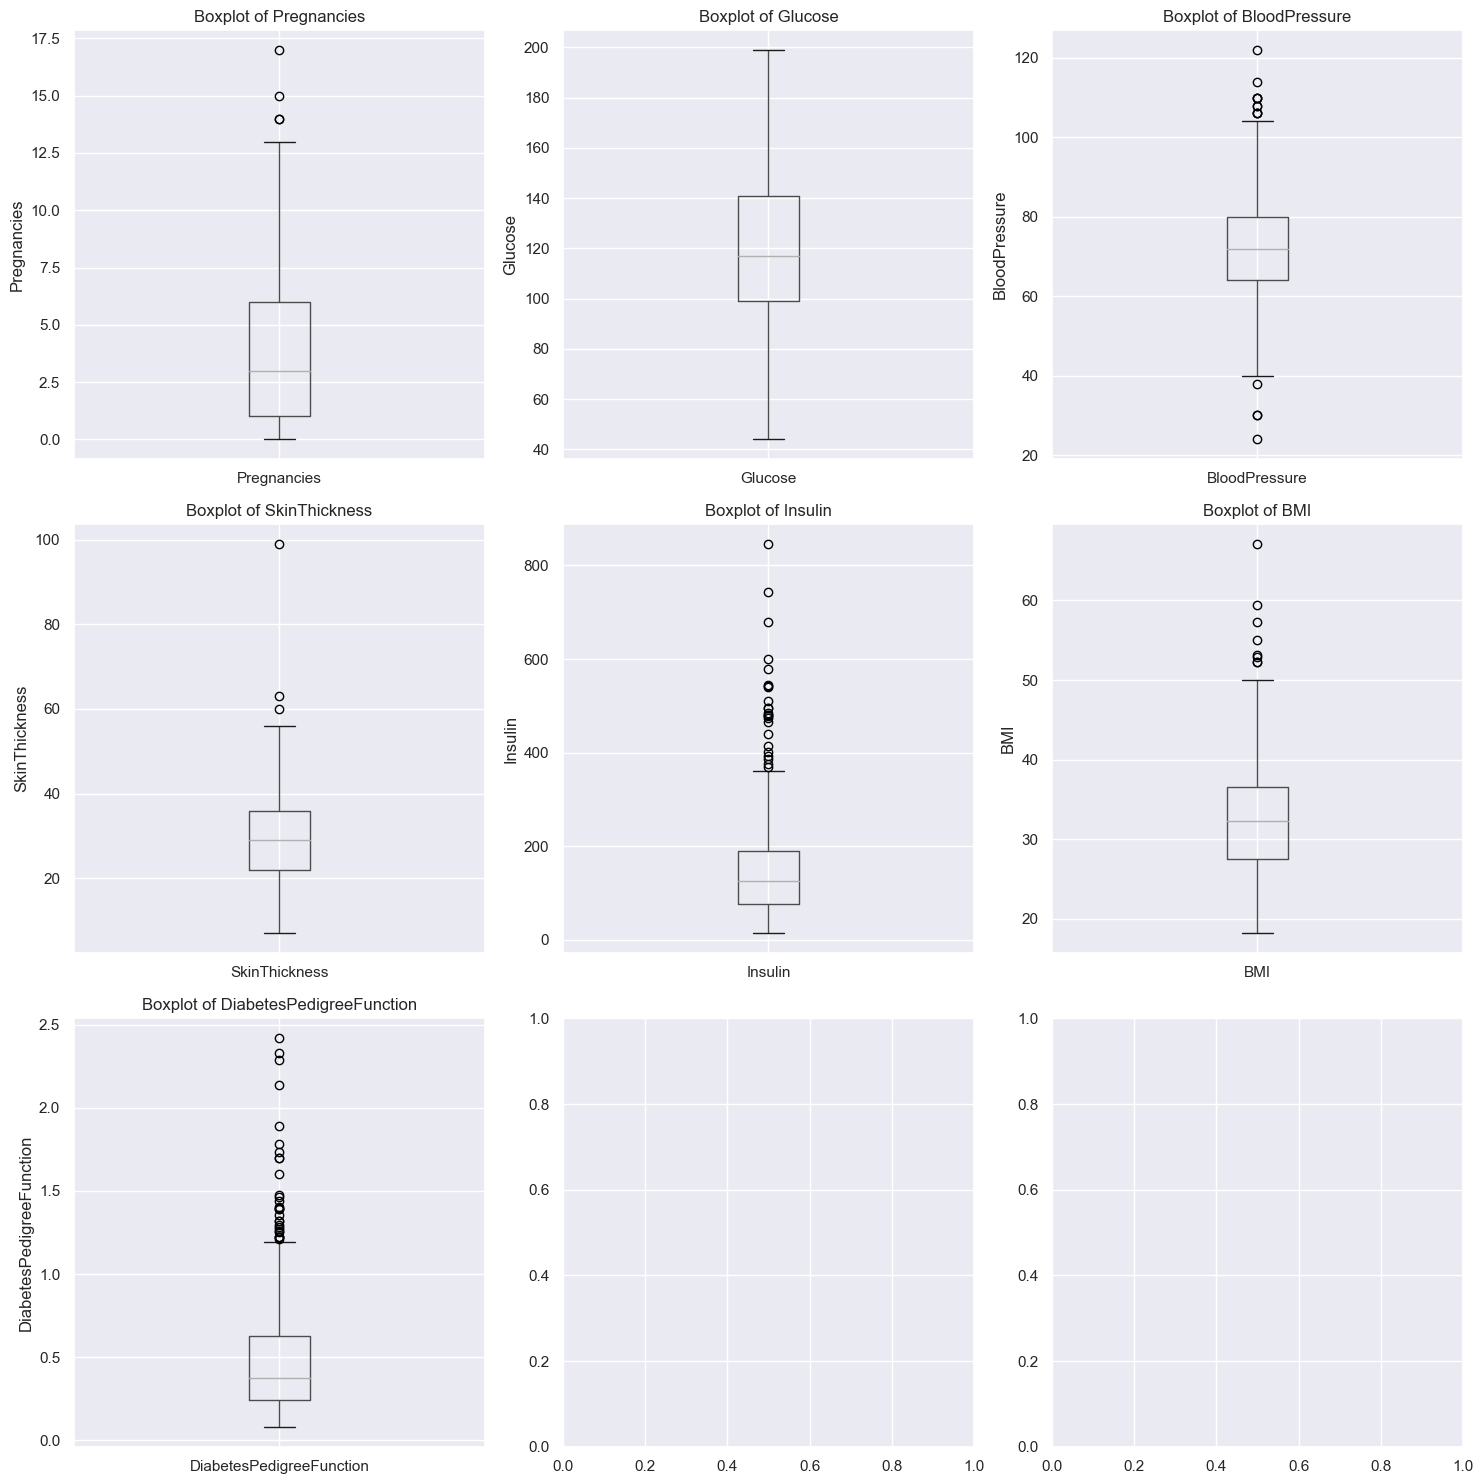

In [14]:
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
fig,axes=plt.subplots(3,3,figsize=(15,15))
for i,feature in enumerate(features):
    row_index=i//3
    col_index=i%3
    ax=axes[row_index][col_index]
    data.boxplot(column=feature,ax=ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

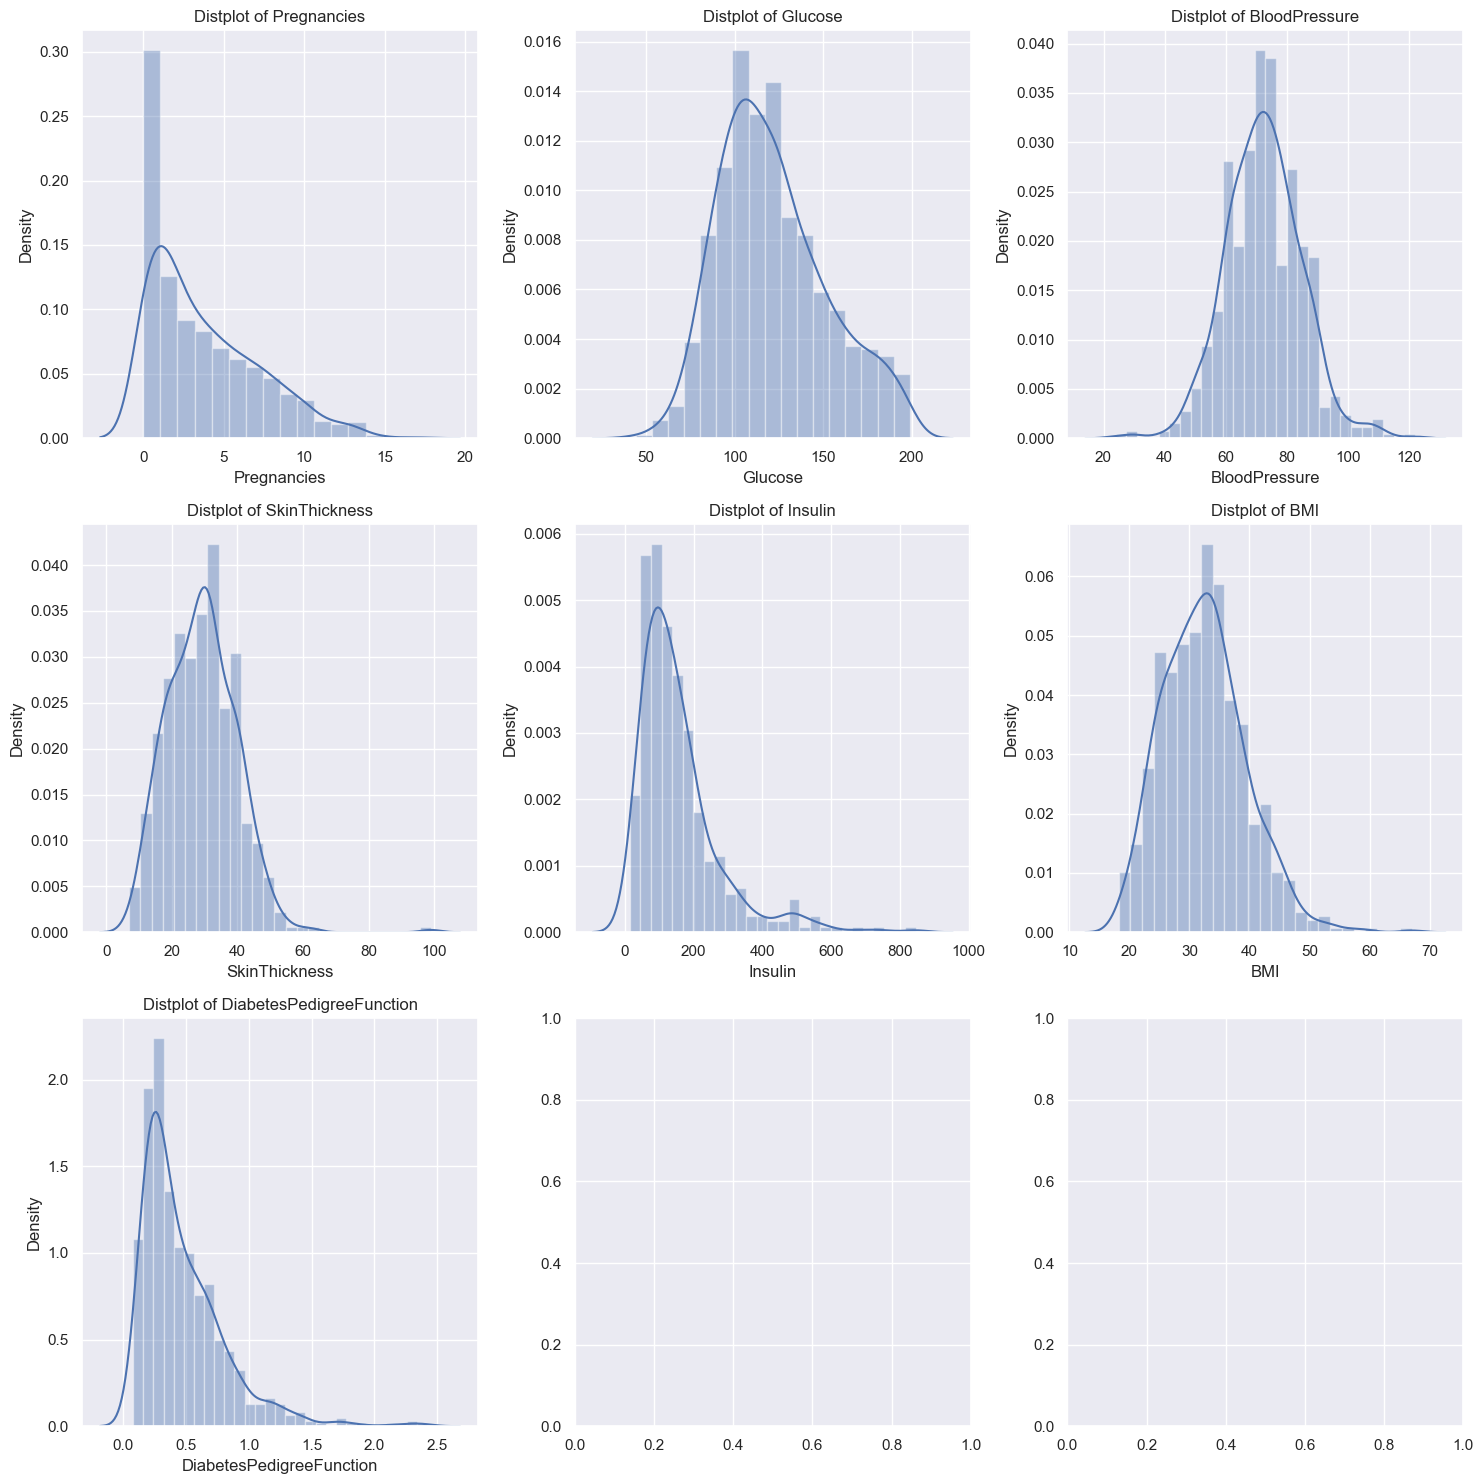

In [15]:
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
fig,axes=plt.subplots(3,3,figsize=(15,15))
for i,feature in enumerate(features):
    row_index=i//3
    col_index=i%3
    ax=axes[row_index][col_index]
    sns.distplot(data[feature],ax=ax,kde=True) 
    ax.set_title(f'Distplot of {feature}')
    ax.set_xlabel(feature) 
plt.tight_layout()
plt.show()

treat outliers using quantile based flooring and capping.

In [16]:
features=['BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
data[features]=np.log(data[features])
lower_quantile = 0.05 
upper_quantile = 0.95
lower_threshold=data[features].quantile(lower_quantile)
upper_threshold=data[features].quantile(upper_quantile)
df=data.copy() 
for feature in features:
    df[feature]=df[feature].clip(lower=lower_threshold[feature],upper=upper_threshold[feature])
df['Pregnancies']=df['Pregnancies'].replace([14,15,17],[12,12,12])

lower_quantile and upper_quantile represent the lower and upper quantiles, respectively, defining the range within which the data will be capped.
lower_threshold and upper_threshold are calculated based on the specified quantiles for each feature.
clip() function is used to replace outliers with the calculated thresholds for each feature.

check for outliers again using boxplot.

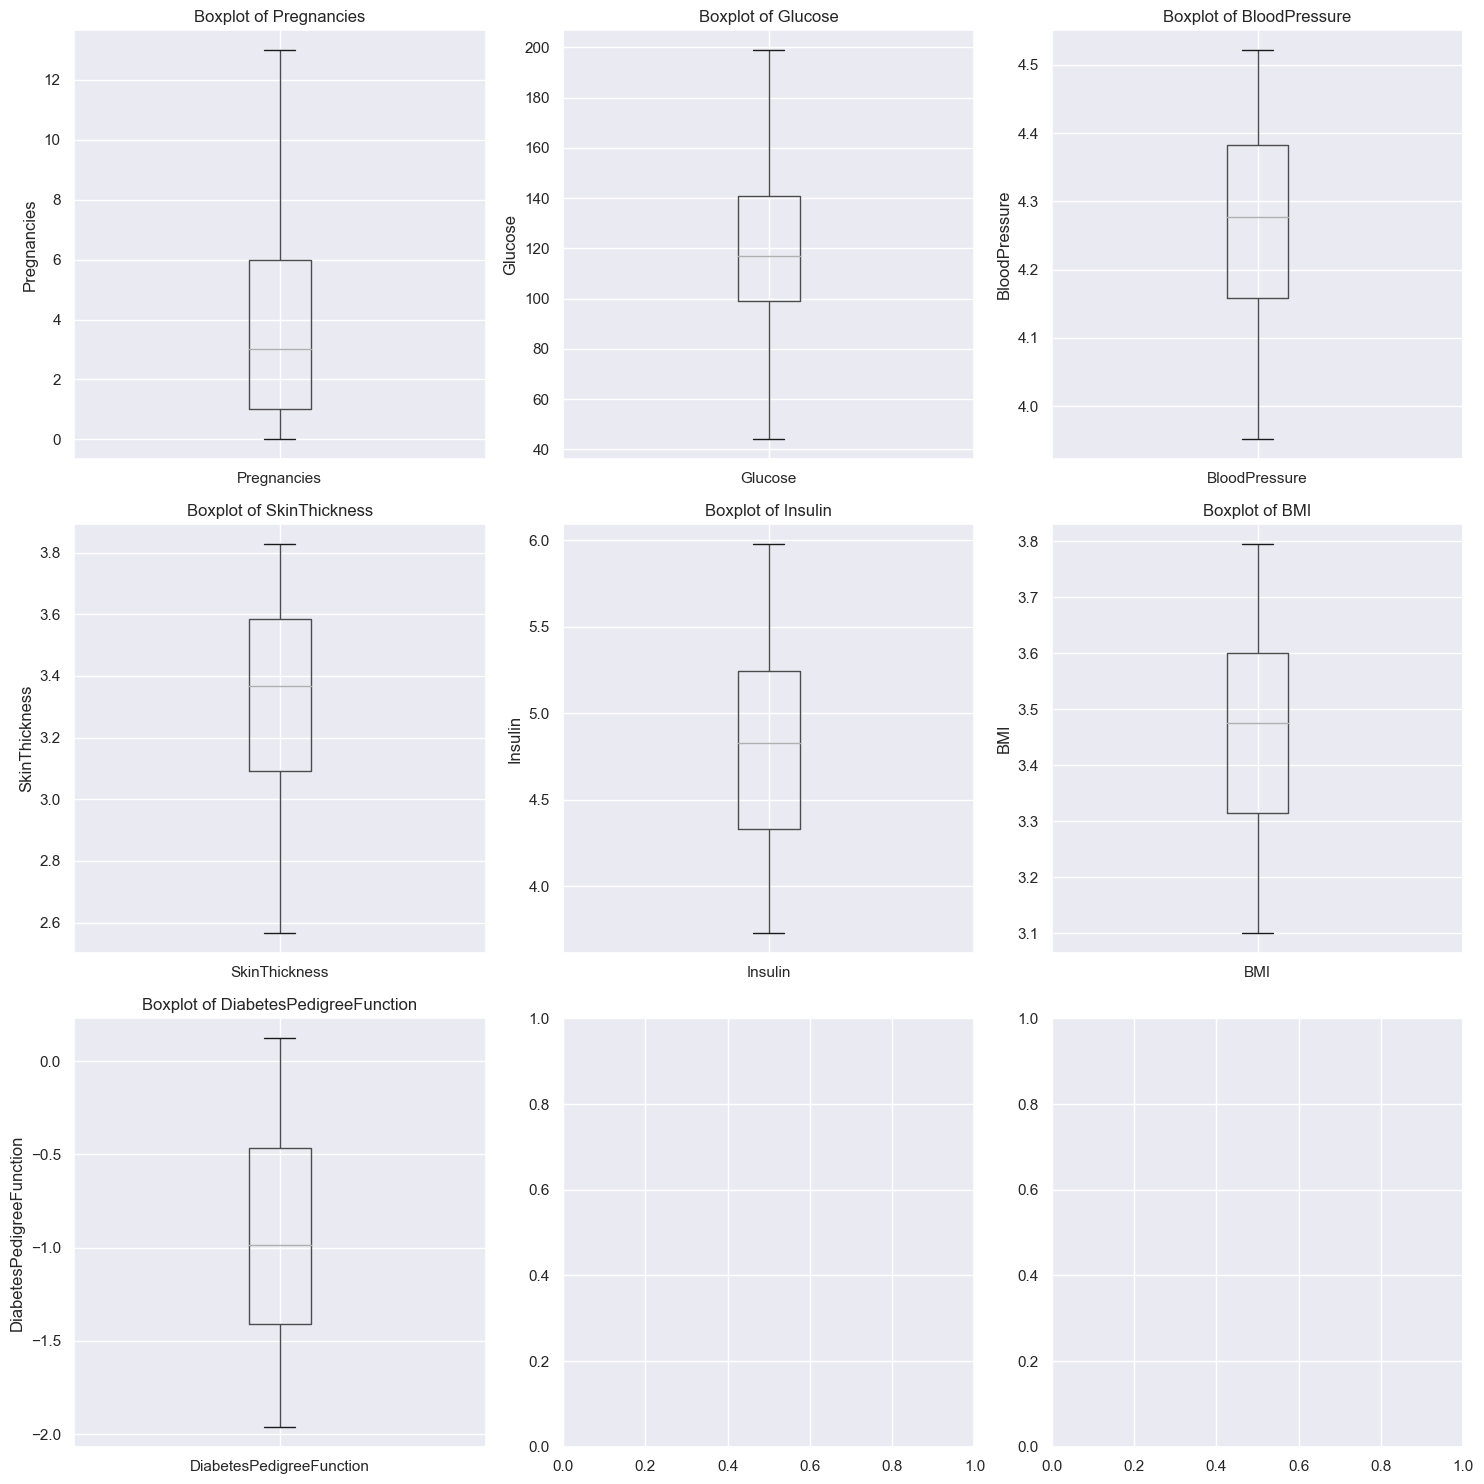

In [17]:
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
fig,axes=plt.subplots(3,3,figsize=(15,15))
for i,feature in enumerate(features):
    row_index=i//3
    col_index=i%3
    ax=axes[row_index][col_index]
    df.boxplot(column=feature,ax=ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

hence outliers are treated.now lets fill the missing values in dataset using mean and median approach or either deleting the row.

In [18]:
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,4.276666,3.555348,4.828314,3.514526,-0.466809,50,1
1,1,85.0,4.189655,3.367296,4.828314,3.280911,-1.046969,31,0
2,8,183.0,4.158883,3.367296,4.828314,3.148453,-0.397497,32,1
3,1,89.0,4.189655,3.135494,4.543295,3.335770,-1.789761,21,0
4,0,137.0,3.951244,3.555348,5.123964,3.763523,0.124729,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,4.330733,3.828641,5.192957,3.493473,-1.766092,63,0
764,2,122.0,4.248495,3.295837,4.828314,3.605498,-1.078810,27,0
765,5,121.0,4.276666,3.135494,4.718499,3.265759,-1.406497,30,0
766,1,126.0,4.094345,3.367296,4.828314,3.404525,-1.052683,47,1


<Axes: >

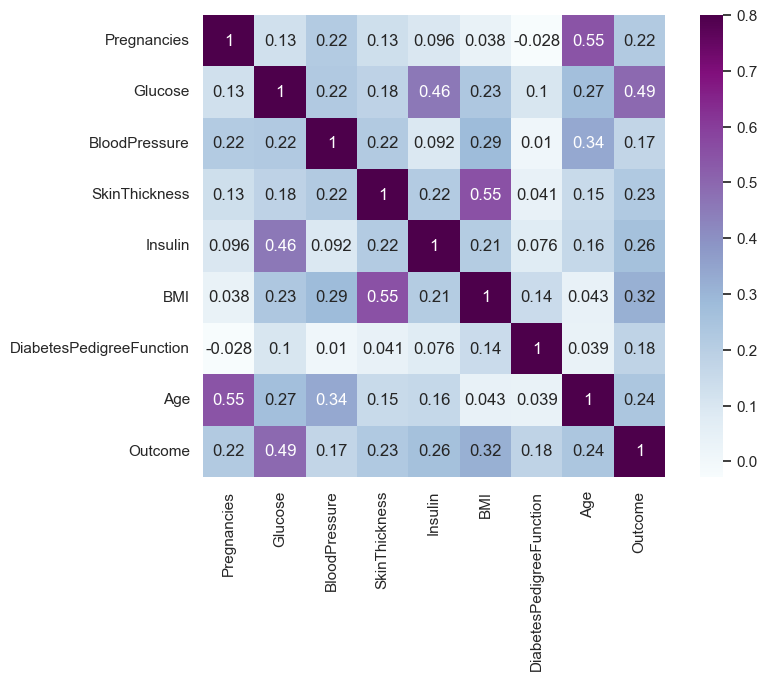

In [21]:
corr_matrix=df.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix,vmax=.8,square=True,cmap='BuPu',annot=True)

lets use normalization technique.

In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
features_normalize=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
minmax_scaler=MinMaxScaler()
standard_scaler=StandardScaler()
data_minmax_scaled=df.copy()
data_minmax_scaled[features_normalize]=minmax_scaler.fit_transform(df[features_normalize])
data_minmax_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.670968,0.570371,0.783734,0.488296,0.595967,0.716744,50,1
1,0.076923,0.264516,0.417866,0.634922,0.488296,0.260023,0.438936,31,0
2,0.615385,0.896774,0.363932,0.634922,0.488296,0.069545,0.749934,32,1
3,0.076923,0.290323,0.417866,0.451490,0.361669,0.338910,0.083252,21,0
4,0.000000,0.600000,0.000000,0.783734,0.619647,0.954032,1.000000,33,1
...,...,...,...,...,...,...,...,...,...
763,0.769231,0.367742,0.665135,1.000000,0.650299,0.565692,0.094587,63,0
764,0.153846,0.503226,0.520996,0.578375,0.488296,0.726787,0.423689,27,0
765,0.384615,0.496774,0.570371,0.451490,0.439508,0.238234,0.266777,30,0
766,0.076923,0.529032,0.250814,0.634922,0.488296,0.437783,0.436200,47,1


In [23]:
data_standard_scaled=df.copy()
data_standard_scaled[features_normalize]=standard_scaler.fit_transform(df[features_normalize])
data_standard_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.653577,0.865108,0.052328,0.769270,0.014943,0.294395,0.821708,50,1
1,-0.851963,-1.206162,-0.528098,0.142114,0.014943,-0.910856,-0.143293,31,0
2,1.255792,2.015813,-0.733366,0.142114,0.014943,-1.594223,0.936997,32,1
3,-0.851963,-1.074652,-0.528098,-0.630946,-0.626443,-0.627834,-1.378807,21,0
4,-1.153071,0.503458,-2.118463,0.769270,0.680254,1.579003,1.805635,33,1
...,...,...,...,...,...,...,...,...,...
763,1.858008,-0.680125,0.412993,1.680705,0.835510,0.185777,-1.339437,63,0
764,-0.550855,0.010298,-0.135591,-0.096202,0.014943,0.763730,-0.196255,27,0
765,0.352469,-0.022579,0.052328,-0.630946,-0.232176,-0.989026,-0.741310,30,0
766,-0.851963,0.141808,-1.163882,0.142114,0.014943,-0.273115,-0.152798,47,1


<Axes: >

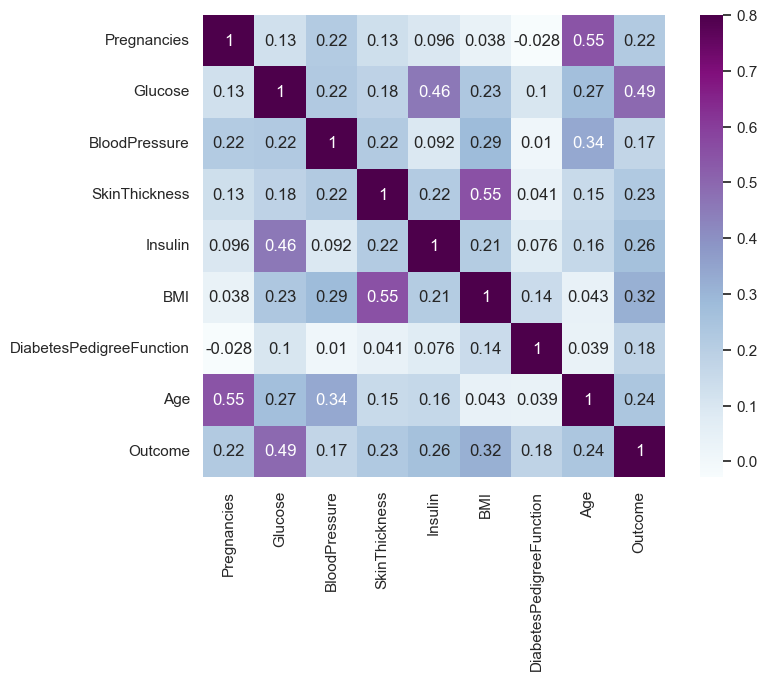

In [24]:
corr_matrix=data_standard_scaled.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix,vmax=.8,square=True,cmap='BuPu',annot=True)

<Axes: >

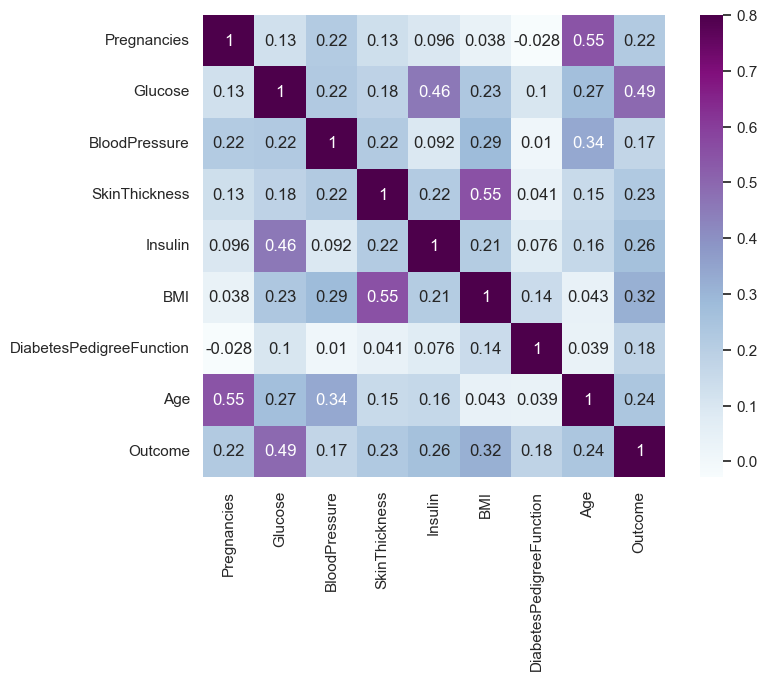

In [25]:
corr_matrix=data_minmax_scaled.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix,vmax=.8,square=True,cmap='BuPu',annot=True)

# hypothesis testing

hypothesis test procedure:<br>
    1. state the null hypothesis and the alternative hypothesis.<br>
    2. choose a significance level.<br>
    3. find the p-value.<br>
    4. reject or fail to reject the hypothesis.<br>
    5. visualize distributions.

lets assume our first hypothesis as:<br>
null hypothesis:There is no difference in average BMI between diabetic and non-diabetic person.<br>
alternative hypothesis:There is a difference in average BMI between diabetic and non-diabetic person. 

In [26]:
significance_level=0.05

In [27]:
df_diabetes_yes=df[df['Outcome']==1]
df_diabetes_no=df[df['Outcome']==0]

In [28]:
df_diabetes_yes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,4.276666,3.555348,4.828314,3.514526,-0.466809,50,1
2,8,183.0,4.158883,3.367296,4.828314,3.148453,-0.397497,32,1
4,0,137.0,3.951244,3.555348,5.123964,3.763523,0.124729,33,1
6,3,78.0,3.951244,3.465736,4.477337,3.433987,-1.394327,26,1
8,2,197.0,4.248495,3.806662,5.980078,3.417727,-1.845160,53,1


In [29]:
df_diabetes_no.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,4.189655,3.367296,4.828314,3.280911,-1.046969,31,0
3,1,89.0,4.189655,3.135494,4.543295,3.335770,-1.789761,21,0
5,5,116.0,4.304065,3.367296,4.828314,3.242592,-1.604450,30,0
7,10,115.0,4.268822,3.367296,4.828314,3.563883,-1.963622,29,0
10,4,110.0,4.521789,3.367296,4.828314,3.627004,-1.655482,30,0


In [30]:
df_bmi_yes=df_diabetes_yes['BMI']
df_bmi_no=df_diabetes_no['BMI']

In [31]:
print('average bmi of diabetic is {} and non diabetic is {}'.format(df_bmi_yes.mean(),df_bmi_no.mean()))

average bmi of diabetic is 3.5411490401974337 and non diabetic is 3.4126076505088836


In [32]:
ttest,p_value=stats.ttest_ind(df_bmi_yes,df_bmi_no)
if p_value<significance_level:
    print('p value is {}, so reject the null hypothesis.'.format(p_value))
else:
    print('p value is {}, so accept the null hypothesis.'.format(p_value))

p value is 2.7917634147026037e-19, so reject the null hypothesis.


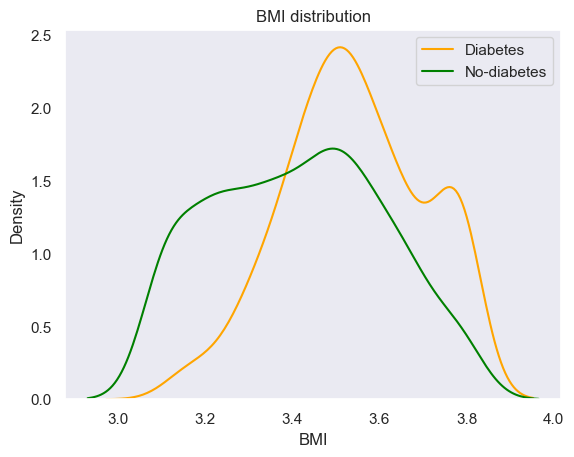

In [33]:
#visualize BMI distribution for diabetic and non-diabetic person.
sns.kdeplot(df_bmi_yes,color='orange')
sns.kdeplot(df_bmi_no,color='green')
plt.grid()
plt.title('BMI distribution')
plt.legend(['Diabetes', 'No-diabetes'])

let's assume our second hypothesis.<br>
null hypothesis:There is no difference in average Age between diabetic and non-diabetic person.<br>
alternative hypothesis:There is a difference in average Age between diabetic and non-diabetic person.

In [34]:
df_age_yes=df_diabetes_yes['Age']
df_age_no=df_diabetes_no['Age']

In [35]:
print('average age for diabetic person is {} and non-diabetic person is {}'.format(df_age_yes.mean(),df_age_no.mean()))

average age for diabetic person is 37.06716417910448 and non-diabetic person is 31.19


In [36]:
ttest,p_value=stats.ttest_ind(df_age_yes,df_age_no)
if p_value<significance_level:
    print('p value is {}, so reject the null hypothesis.'.format(p_value))
else:
    print('p value is {}, so accept the null hypothesis.'.format(p_value))

p value is 2.2099754606654358e-11, so reject the null hypothesis.


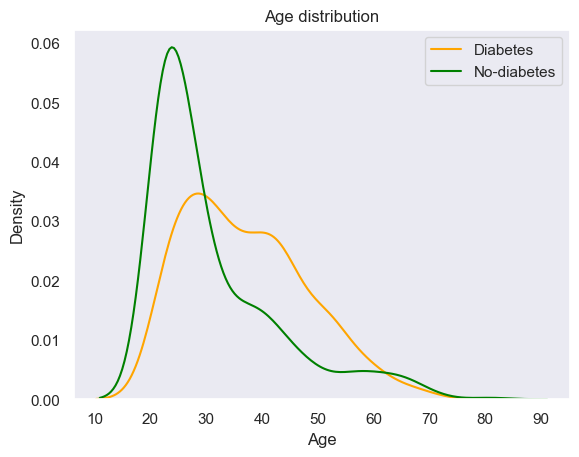

In [37]:
sns.kdeplot(df_age_yes,color='orange')
sns.kdeplot(df_age_no,color='green')
plt.grid()
plt.title('Age distribution')
plt.legend(['Diabetes','No-diabetes'])

let's take another hypothsis as:<br>
null hypothesis:There is no difference in average Insulin between diabetic and non-diabetic person.<br>
alternative hypothesis:There is a difference in average Insulin between diabetic and non-diabetic person.

In [38]:
df_insulin_yes=df_diabetes_yes['Insulin']
df_insulin_no=df_diabetes_no['Insulin']

In [39]:
print('average insulin for diabetic person is {}, and for non-diabetic person is {}'.format(df_insulin_yes.mean(),df_insulin_no.mean()))

average insulin for diabetic person is 4.9800631739652035, and for non-diabetic person is 4.736776195704529


In [40]:
ttest,p_value=stats.ttest_ind(df_insulin_yes,df_insulin_no)
if p_value<significance_level:
    print('p value is {}, so reject null hypothesis.'.format(p_value))
else:
    print('p value is {}, so accept null hypothesis.'.format(p_value))

p value is 2.0189672879885322e-13, so reject null hypothesis.


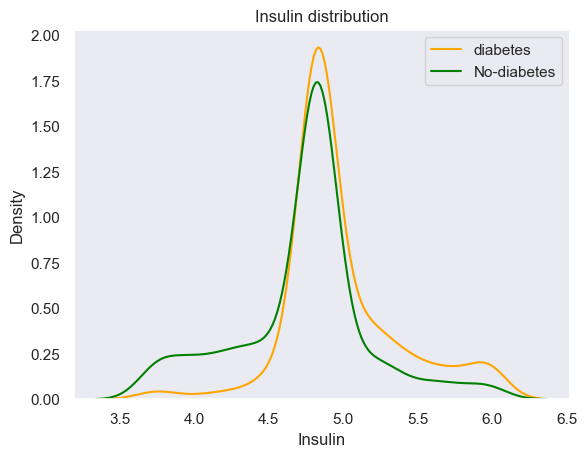

In [41]:
sns.kdeplot(df_insulin_yes,color='orange')
sns.kdeplot(df_insulin_no,color='green')
plt.grid()
plt.title('Insulin distribution')
plt.legend(['diabetes','No-diabetes'])

# Report

1. Diabetes Dataset is not balanced.so, we must need more data to perform good analysis.<br>
2. There is outlier in Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction. we have treated all outliers first using log function then we have used quantile based flooring and capping on every feature except pregancies feature.I have replaced some highest no. of pregnancies to threshold highest no. of pregancy. we can use some another approach also to treat outliers like deleting the row, replacing the outlier value with mean or median value.<br>
3. heatmap indicate value closer to 0.8 as a good relationship between variables. i.e. Glucose and outcome,Glucose and Insulin variable and so on.<br>
4. Here i have used two normalization technique standard scaling and min-max scaling but there is not much effect on correlation of dataset. so, we need to improve this.<br>
5.we need to visualize Glucose to find relationship among dibatic and non-diabetic person by glucose level.

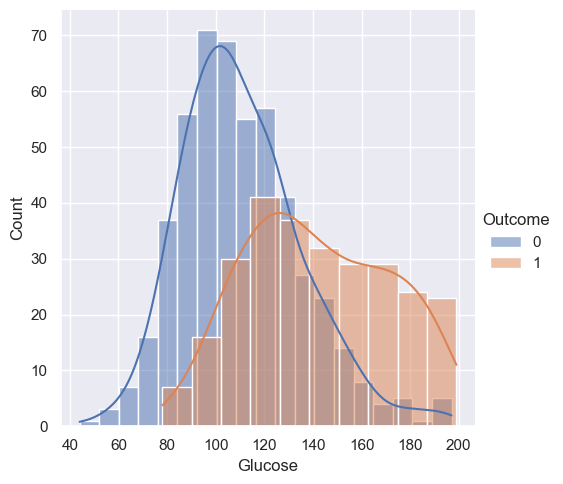

In [42]:
sns.FacetGrid(df,hue='Outcome',height=5).map(sns.histplot,'Glucose',kde=True).add_legend()

The curve is right-skewed which indicates there are outliers. we need to visulaize it more.

some observations from curve is:<br>
1.The Median of Glucose levels for non-diabetic person is 110, whereas for a diabetic is 145.<br>
2.If Glucose levels are <=80, no diabetes.<br>
3.If Glucose levels are >80 and <125,then there is a very low probability of having diabetes.<br>
4.If Glucose levels >=125 and <175,then there is a high probability of having diabetes.<br>
5.If Glucose levels are >175,then the person has diabetes.